In [1]:
# Tool
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.model_selection import train_test_split

%matplotlib inline

#### 1.7 アイリスのクラス分類

In [2]:
# データを読む
from sklearn.datasets import load_iris
iris_dataset = load_iris()

## 第2章　教師あり学習

#### 2.1 クラス分類と回帰

#### 2.3.1 サンプルデータセットの確認

In [3]:
# データセットの生成(forgeデータセット)
X, y = mglearn.datasets.make_forge()

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shepe:(26, 2)


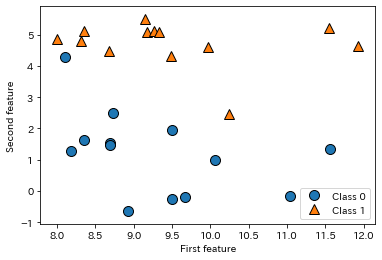

In [4]:
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shepe:{}'.format(X.shape))

Text(0, 0.5, 'Target')

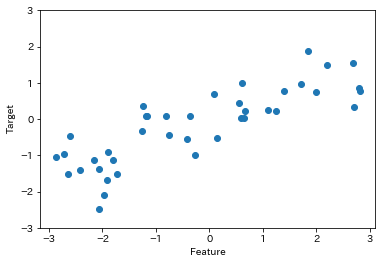

In [5]:
# データセットの生成(waveデータセット)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [6]:
# データセットの生成(cancerデータセット)#
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# データサイズの確認
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [8]:
# クラスことのサンプル数
# benign:良性、malignant:悪性
print('Sample counts per class:\n{}'.format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [9]:
# 個々の特徴量の意味
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
# データセットの生成(bostonデータセット)
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [11]:
# データセットを拡張し、特徴量間の積を含めたデータ
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


## 3章　教師なし学習と前処理

### 3.3 前処理とスケール変換

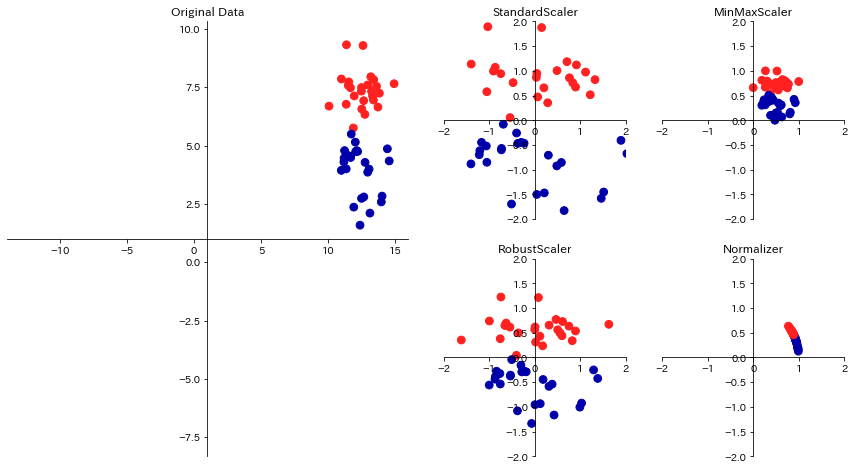

In [12]:
mglearn.plots.plot_scaling()

#### 3.3.1 さまざまな前処理
- StandardScaler:個々の特徴量の平均が0で分散が1になるように変換
- RobustScaler:個々の特徴量が一定の範囲に入るように変換で中央値と四分位数を用いるので外れ値が無視できる
- MinMaxScaler:データがちょうど0から1の間に入るように変換
- Normalizer:個々のデータポイントを特徴量ベクトルがユークリッド長1になるように変換、方向だけが問題になる場合に使われる

#### 3.3.2 データ変換の適用

###### カーネル法を用いたSVMをcancerデータセットに適用し、MinMaxScalerを前処理に用いる

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [14]:
# 前処理を実装したクラスをインポートしてインスタンスを生成する
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
# fitメソッドを訓練データに対して適用し、スケール変換器を適合させる
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
# 訓練データをスケール変換するにはtransformメソッドを用いる

# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print('trainsformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scaling:\n {}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling:\n {}'.format(X_train.max(axis=0)))
print('per-feature minimum after scaling:\n {}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n {}'.format(X_train_scaled.max(axis=0)))

trainsformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print('per-feature minimum after scaling:\n {}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n {}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 3.3.3 訓練データとテストデータを同じように変換する
##### テストセットの最小値とレンジを使うと何が起こるか

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

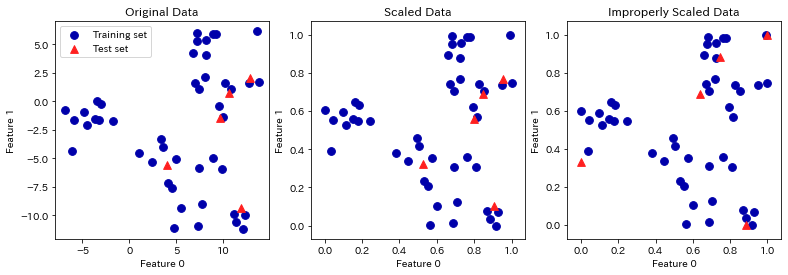

In [18]:
from sklearn.datasets import make_blobs

# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],marker='^', c=mglearn.cm2(1), label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],marker='^',c=mglearn.cm2(1), label='Test set', s=60)
axes[1].set_title('Scaled Data')

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる。ここでは説明のためにわざとやる
# *実際にはNG＊
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],marker='^',c=mglearn.cm2(1), label='Test set', s=60)
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

#### 3.3.4 教師あり学習における前処理の効果

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# 0-1 スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# 平均を0に分散1に前処理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


## 3.4 次元削減、特徴量抽出、多様体学習

### 3.4.1. 主成分分析(PCA)

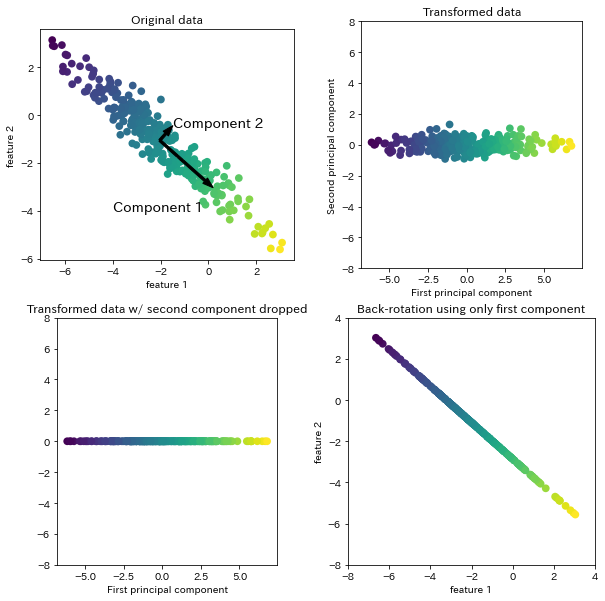

In [22]:
mglearn.plots.plot_pca_illustration()

In [23]:
# cancerデータ
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

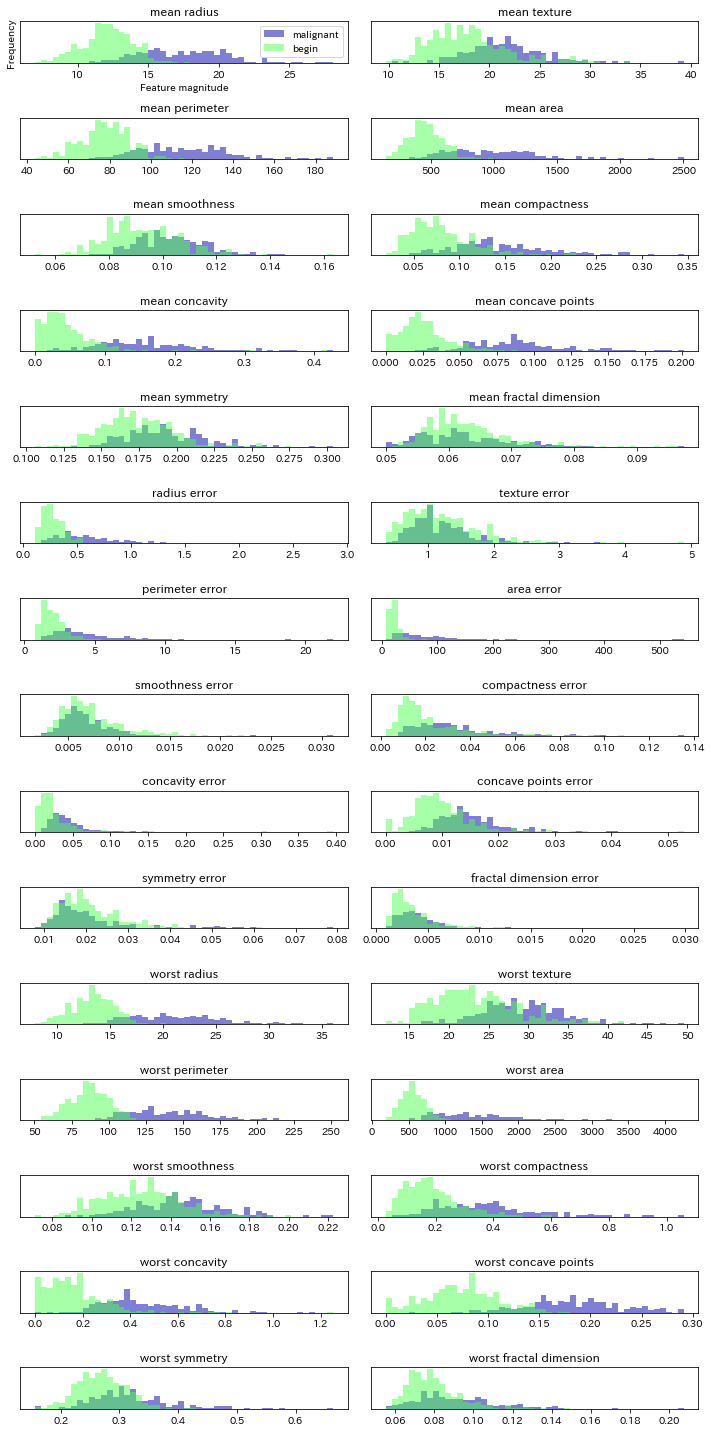

In [24]:
# cancerデータを特徴量ごとに２つのクラス(良性と悪性)のヒストグラムにする

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude') 
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'begin'], loc='best')
fig.tight_layout()

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [14]:
from sklearn.decomposition import PCA
# データの最初の２つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の２つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print('Original shape: {}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal componet')

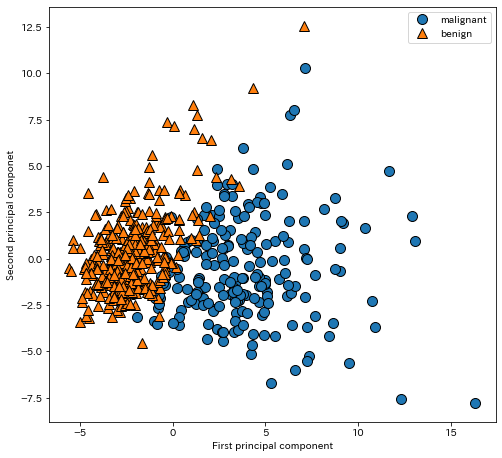

In [15]:
# 第一主成分と第二主成分によるプロット、クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal componet')

In [16]:
print('PCA compornent shape: {}'.format(pca.components_.shape))

PCA compornent shape: (2, 30)


In [17]:
# componets_の中身を見る
print('PCA componets:\n{}'.format(pca.components_))

PCA componets:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

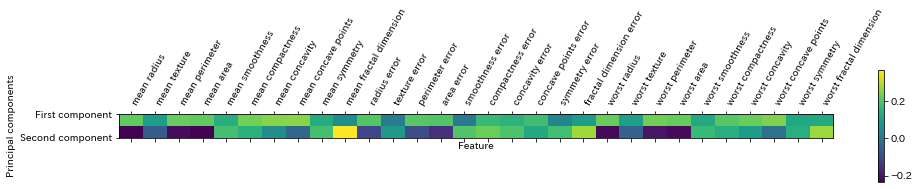

In [30]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

#### 3.4.1.2 固有顔による特徴量抽出

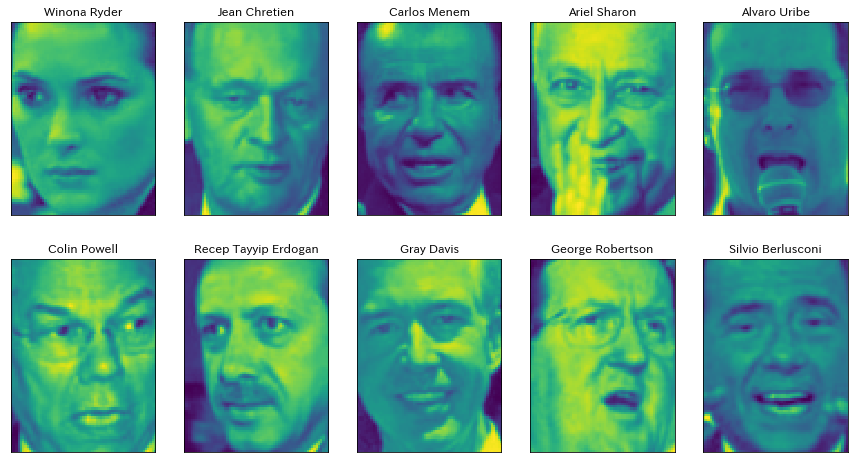

In [18]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [32]:
print('people.image.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people.target_names)))

people.image.shape: (3023, 87, 65)
Number of classes: 62


In [19]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='   ')
    if (i + 1) % 3 ==0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [20]:
# 偏りを減らすために各人の画像を50に制限する

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

In [35]:
people.target.shape

(3023,)

In [21]:
# 1-最近傍法クラス分類器を使って簡単にクラス分けを行う

from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


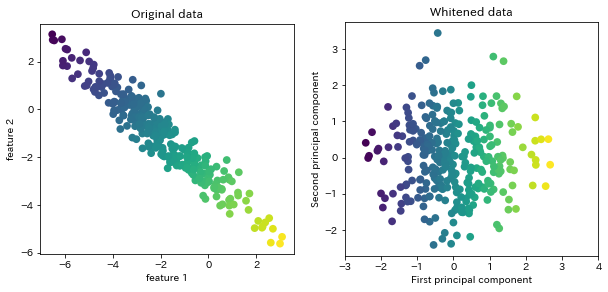

In [37]:
# whitenオプション付きでPCA変換したデータ
mglearn.plots.plot_pca_whitening()

In [22]:
# PCAオブジェクトを訓練し、最初の100主成分を抜き出し、訓練データとテストデータを変換する

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [39]:
# 主成分の最初の100要素を使って1-最近傍法クラス分類をする

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('Test set accuracy: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [40]:
print('pca.components_.shape: {}'.format(pca.components_.shape))

pca.components_.shape: (100, 5655)


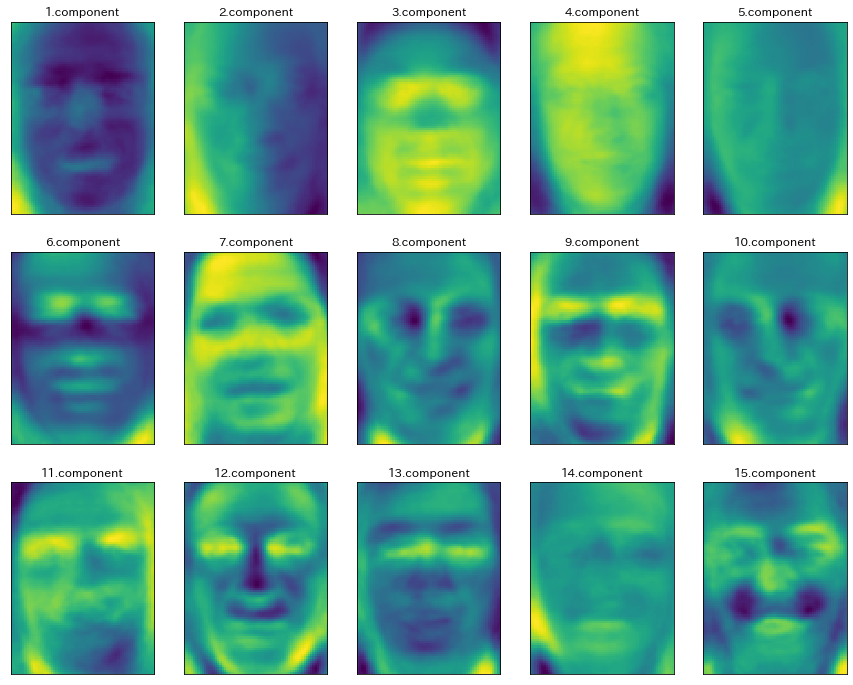

In [41]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('{}.component'.format((i + 1)))

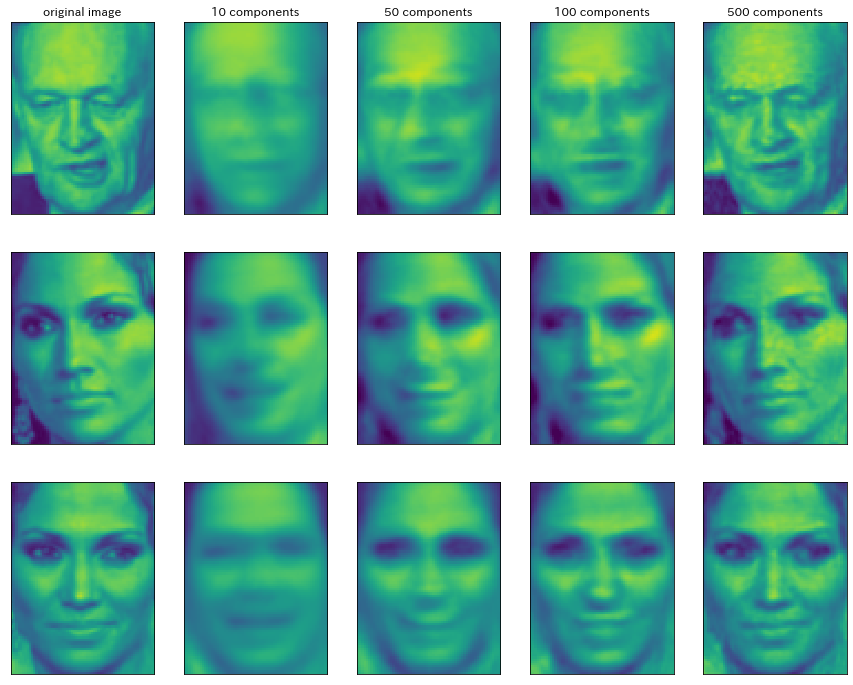

In [42]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Secnd principal component')

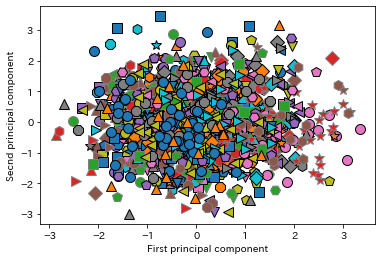

In [43]:
# PCAを用いてデータセット中のすべての顔を最初の２つの主成分を用いて散布図をプロットする
# 最初の２つの主成分を用いた顔画像データセットの散布図
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Secnd principal component')

### 3.4.2 非負値行列因子分解(NMF)

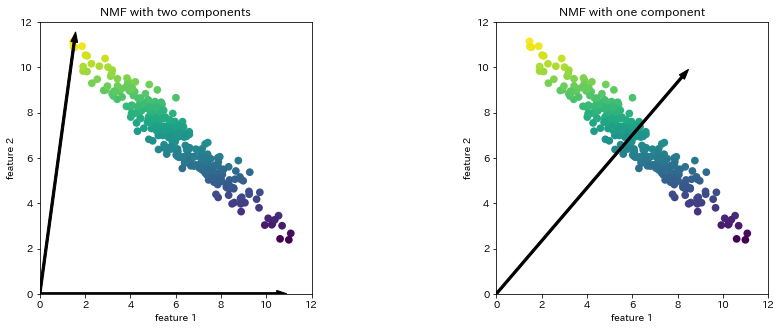

In [45]:
# 二次元のトイデータにNMFを適用する
mglearn.plots.plot_nmf_illustration()

#### 3.4.2.2 NMFの顔画像への適用

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 偏りを減らすために各人の画像を50に制限する

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


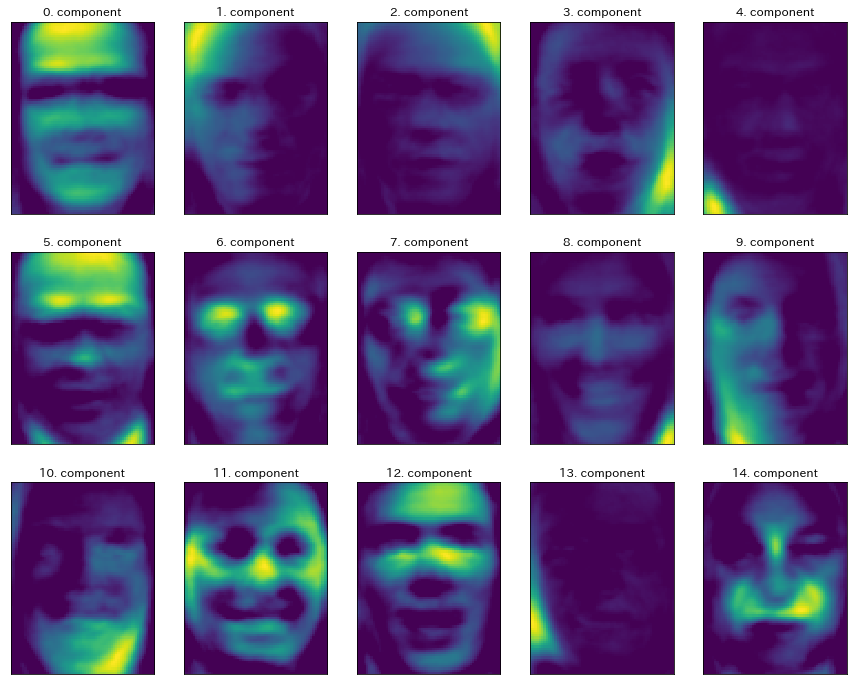

In [6]:
# 最初の15の成分を見る
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))

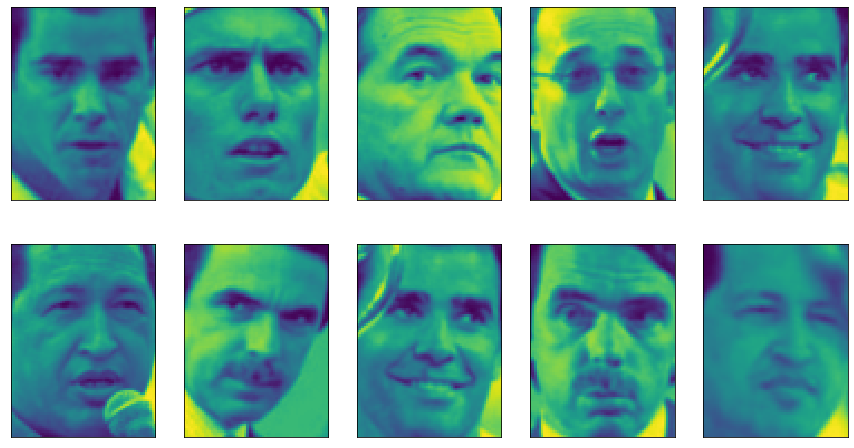

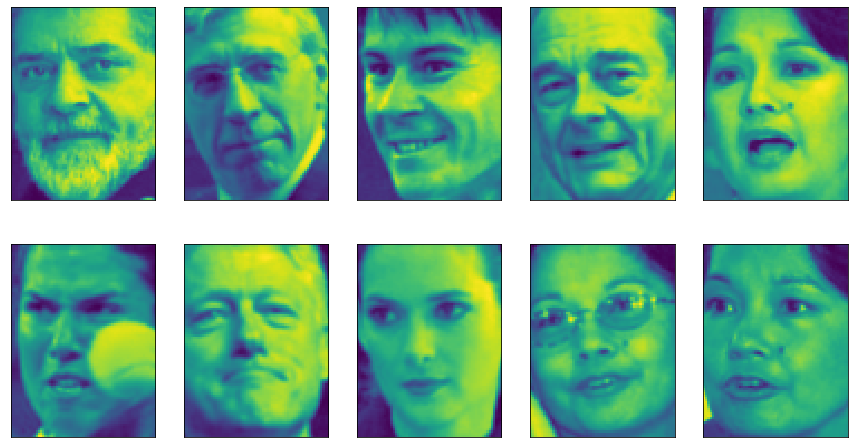

In [7]:
compn = 3
# 3つ目の成分でソート、最初の10画像を表示

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i ,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 7つ目の成分でソート、最初の10画像を表示

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i ,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))    

Text(0, 0.5, 'Signal')

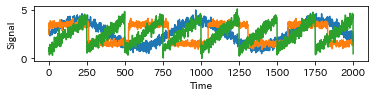

In [9]:
# 3つの信号源からの信号が組み合わされた信号

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [11]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('Shape of measurements: {}'.format(X.shape))

Shape of measurements: (2000, 100)


In [14]:
# NMFを用いてこの３つの信号を復元する

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('Recoverd signal shape: {}'.format(S_.shape))

Recoverd signal shape: (2000, 3)


In [18]:
# 比較のためにPCAでも行う
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

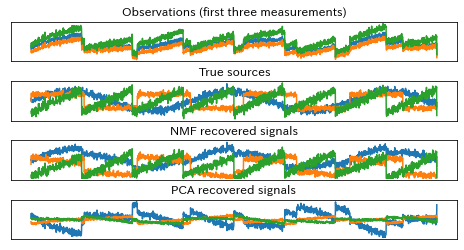

In [24]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### 3.4.3 t-SNEを用いた多様性学習

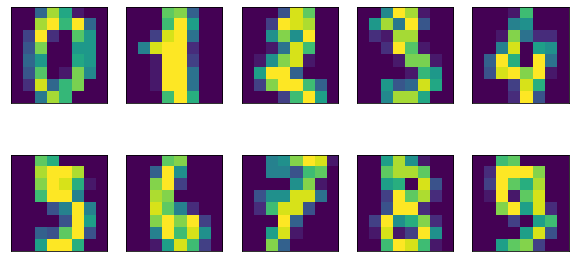

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

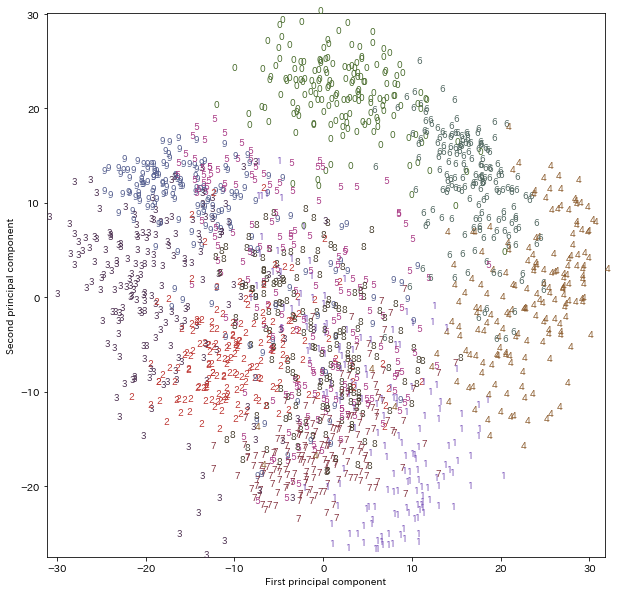

In [27]:
# PCAを使ってこのデータを2次元に可視化する

# PCAモデルを構築
pca = PCA(n_components=2)
pca.fit(digits.data)
# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors= ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
        '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 散布図で数字をプロット
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold', 'size' :9})
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

In [28]:
# t-SNEを使ってこのデータを2次元に可視化する

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# fitではなくfit_transformを用いる。TSNEにはtrasformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

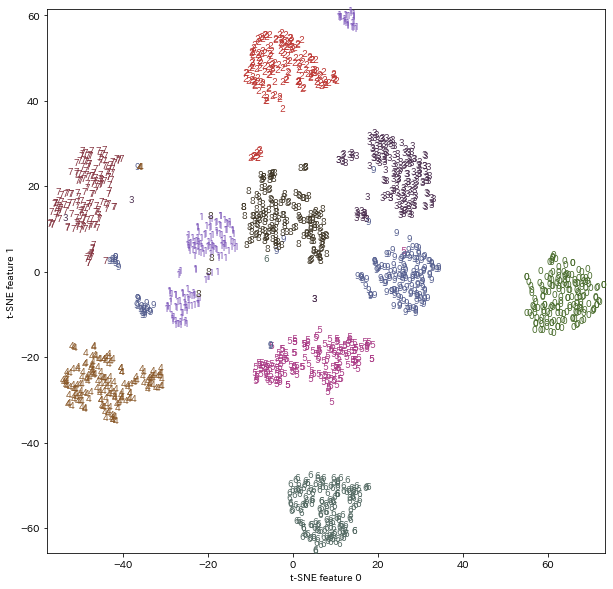

In [29]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 点ではなく数字をテキストにプロットする
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold', 'size' :9})
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')

## 3.5 クラスタリング

### 3.5.1 k-meansクラスタリング

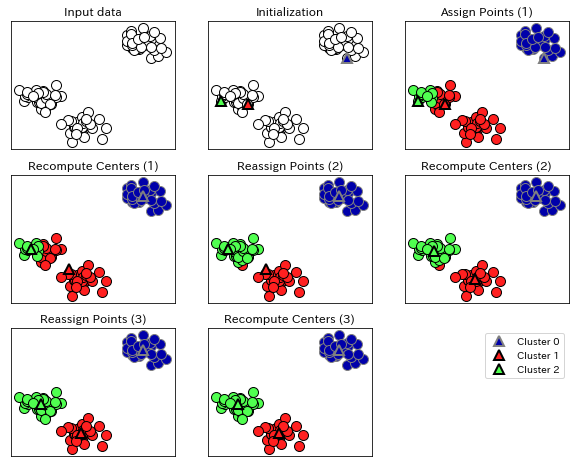

In [30]:
mglearn.plots.plot_kmeans_algorithm()

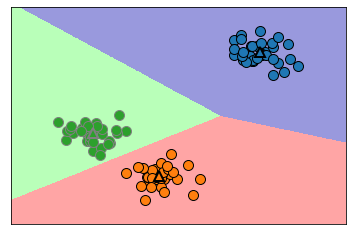

In [31]:
# クラスタセンタの境界を示す
mglearn.plots.plot_kmeans_boundaries()

In [3]:
# k-meansを使う

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
# 割り当てられたラベルを確認する(kmeans.labels_で確認できる)
print('Cluster memberships:\n{}'.format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [5]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


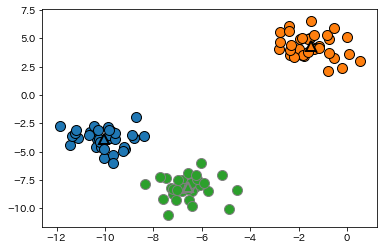

In [6]:
# 散布図を表示する。クラスセンタはcluster_centers_に格納されている
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth=2)

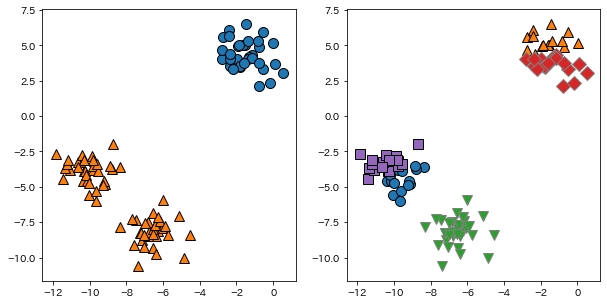

In [7]:
# クラスセンタの数を減らしてみる
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを２つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

#### 3.5.1.1 k-meansがうまくいかない方法 

Text(0, 0.5, 'Feature 1')

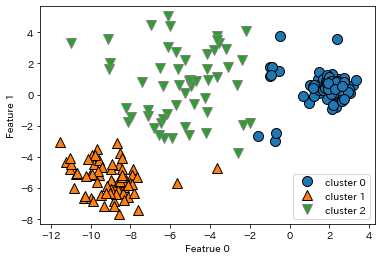

In [12]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('Featrue 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

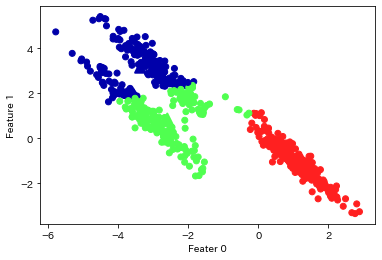

In [14]:
# ランダムにクラスタデータを作成
X, y =make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き延ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel('Feater 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

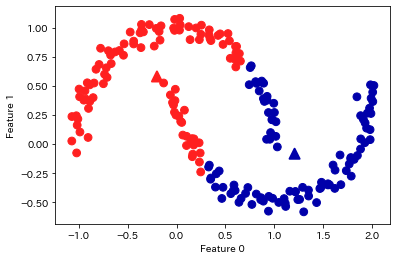

In [16]:
# クラスタが複雑な形の場合

# 合成データセットtwo_moonsデータ作成(今度はノイズ少なめ)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# ２つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 3.5.1.2 ベクトル量子化、もしくは成分分解としてのK-means

In [17]:
# データセットの準備
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 偏りを減らすために各人の画像を50に制限する

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

from sklearn.decomposition import NMF
from sklearn.decomposition import PCA



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

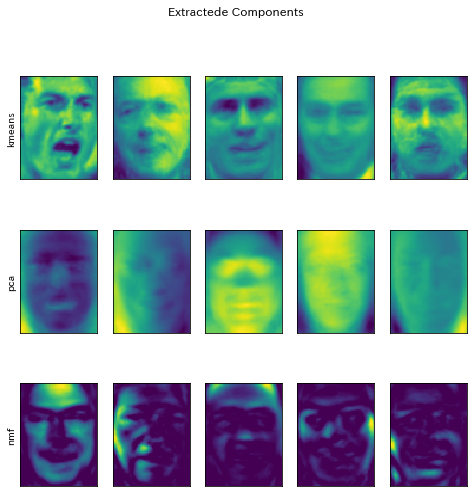

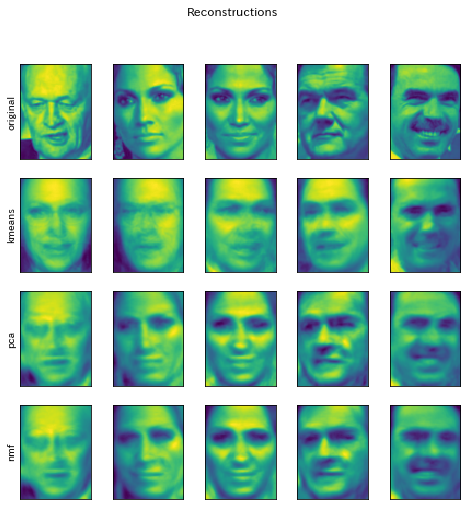

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (),'yticks': ()})
fig.suptitle('Extractede Components')
for ax, comp_kmeans,  comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))   
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle('Reconstructions')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


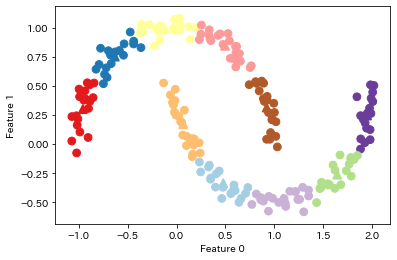

In [33]:
# two_moonsデータセットでベクトル量子化

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
           marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster memberships:\n{}'.format(y_pred))

In [35]:
# 個々のクラスタセンタからの距離を特徴量として用いる
distance_features = kmeans.transform(X)
print('Distance feature shape: {}'.format(distance_features.shape))
print('Distance features:\n{}'.format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### 3.5.2 凝集型クラスタリング

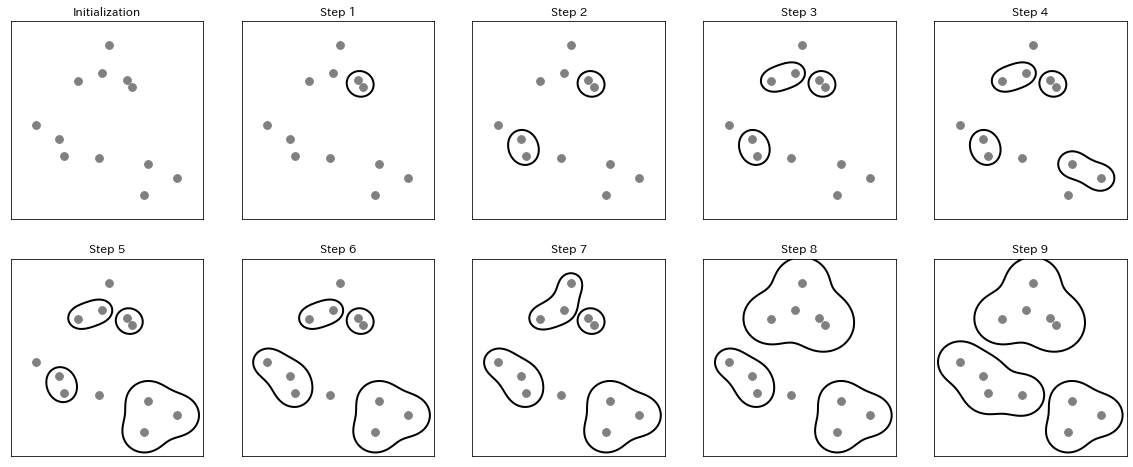

In [2]:
# 2次元データセットに対して、凝集型クラスタリングで3つのクラスタを探す進行過程を示す
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

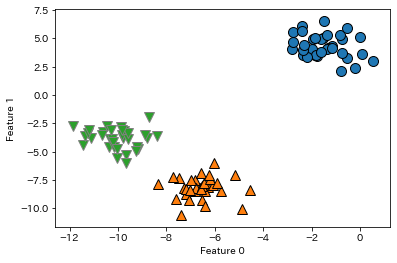

In [4]:
# 凝集型クラスタリングの確認
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 3.5.2.1 階層型クラスタリングとデンドログラム

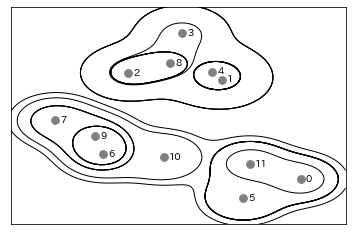

In [5]:
mglearn.plots.plot_agglomerative()

#### SciPyでデンドログラムを描画

Text(0, 0.5, 'Cluster distance')

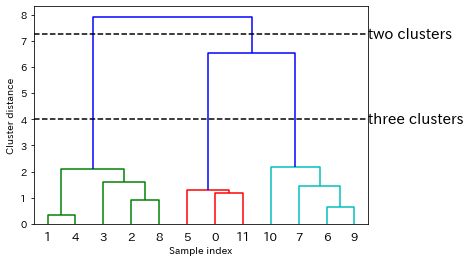

In [11]:
# SciPyからデンドログラム関数とwardクラスタリング関数をインポート
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# wardクラスタリングをデータ配列Xに適用
# Scipyのward関数は、凝集型クラスタリングを行った際のブリッジ距離を示す配列を返す
linkage_array = ward(X)
# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムとしてプロットする
dendrogram(linkage_array)


# 2クラスタと3クラスタの部分での切断を表示
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

### 3.5.3 DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memberships:\n{}'.format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


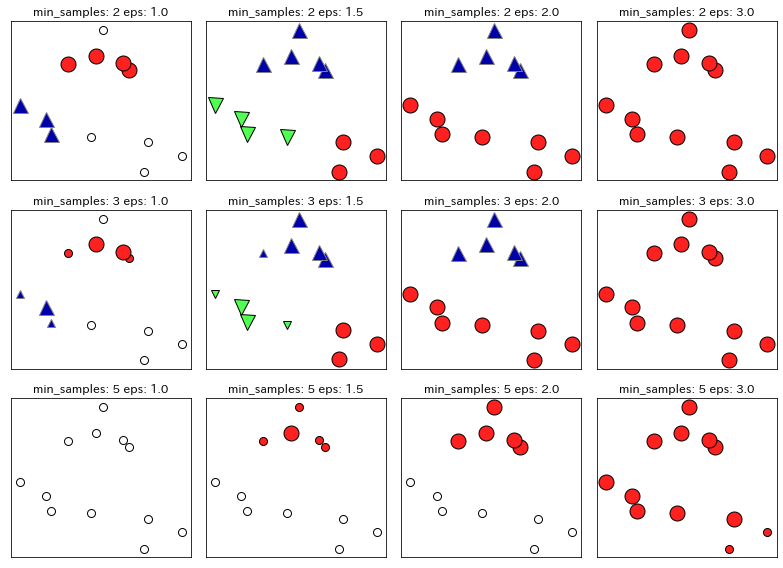

In [14]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

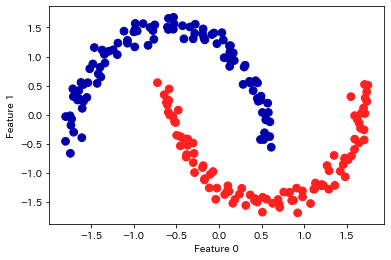

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを平均0分散1にスケール変換
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# クラスタリング結果をプロット
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 3.5.4 クラスタリングアルゴリズムの比較と評価

#### 3.5.4.1 正解データを用いたクラスタリングの評価

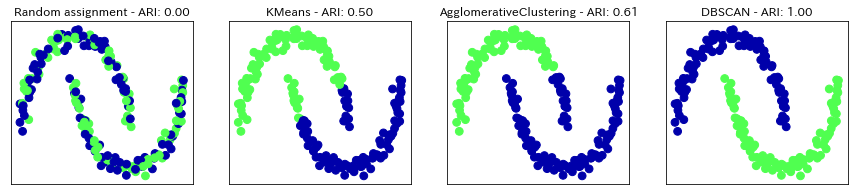

In [22]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを平均0,分散を1にスケール変換する
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 利用するアルゴリズムのリストを作る
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 参照のためにランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # クラスタ割り当てとクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters)))  

In [24]:
from sklearn.metrics import accuracy_score

# この２つのラベルは同じクラスタリングを表している
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 精度はゼロになる。ラベルはまったく一致してないから。
print('Accuracy: {:.2f}'.format(accuracy_score(clusters1, clusters2)))
# ARIスコアは１になる。クラスタリングは同じだからだ。
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


#### 3.5.4.2 正解データを用いないクラスタリングの評価

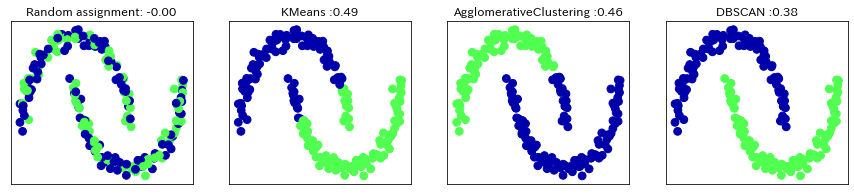

In [30]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# データを平均0,分散を1にスケール変換する
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 参照のためにランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment: {:.2f}'.format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    # クラスタ割り当てとクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} :{:.2f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))  

#### 3.5.4.3  顔画像データセットを用いたアルゴリズムの比較

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
# データセットの準備
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 偏りを減らすために各人の画像を50に制限する

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

In [5]:
# lfwデータから固有値を抽出し、変換する
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

##### 顔画像データセットのDBSCANによる解析

In [6]:
# デフィルト設定でDBSCANを適用する
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [9]:
# min_sampleを小さくして小さいグループをクラスタとして識別させる
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [10]:
# epsを大きくして個々の点の近傍を拡大する
dbscan = DBSCAN(min_samples=3, eps=15)
labels= dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1  0]


In [11]:
# クラスタとノイズのデータポイント数を数える
# bincountは、負の数を許さないので、全て1を加える
# 結果の最初の数がノイズのデータポイント数に対応する
print('Number of points per cluster: {}'.format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


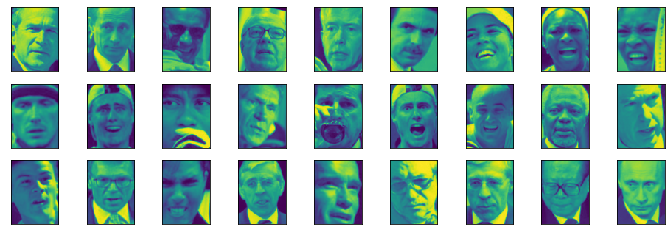

In [13]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks':(),'yticks':()},figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [15]:
# 様々なepsに対する結果を確認する
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('Clusters present: {}'.format(np.unique(labels)))
    print('Clusters size: {}'.format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Clusters size: [2063]

eps=3
Clusters present: [-1]
Clusters size: [2063]

eps=5
Clusters present: [-1]
Clusters size: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Clusters size: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Clusters size: [1307  750    3    3]

eps=11
Clusters present: [-1  0]
Clusters size: [ 413 1650]

eps=13
Clusters present: [-1  0]
Clusters size: [ 120 1943]


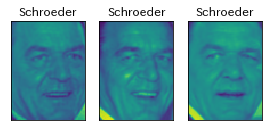

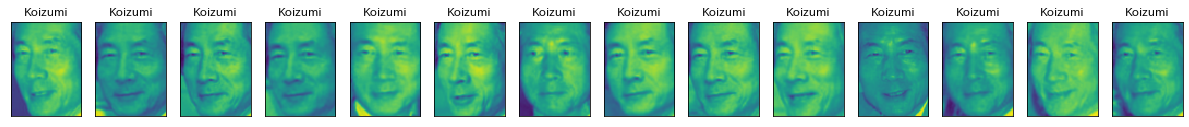

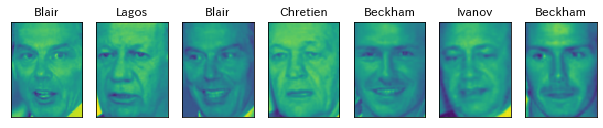

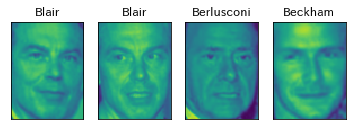

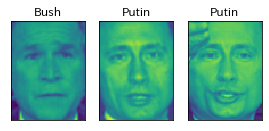

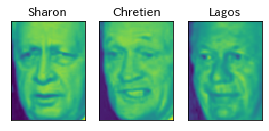

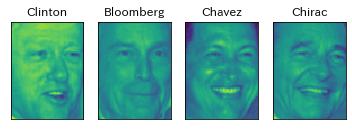

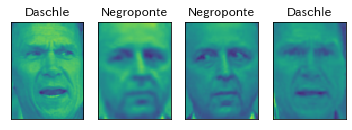

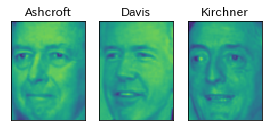

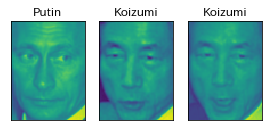

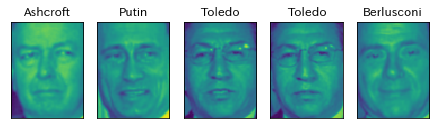

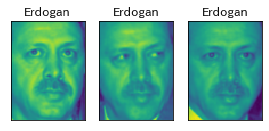

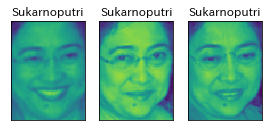

In [17]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                            subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

##### 顔画像データセットのk-meansによる解析

In [20]:
# k-meansでクラスタを抽出
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('Cluster sizes k-means:{}'.format(np.bincount(labels_km)))

Cluster sizes k-means:[155 175 238  75 358 257  91 219 323 172]


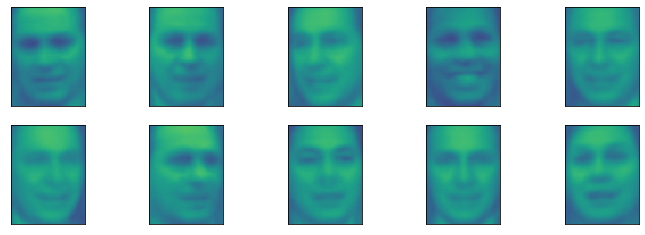

In [22]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':(),'yticks':()},figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

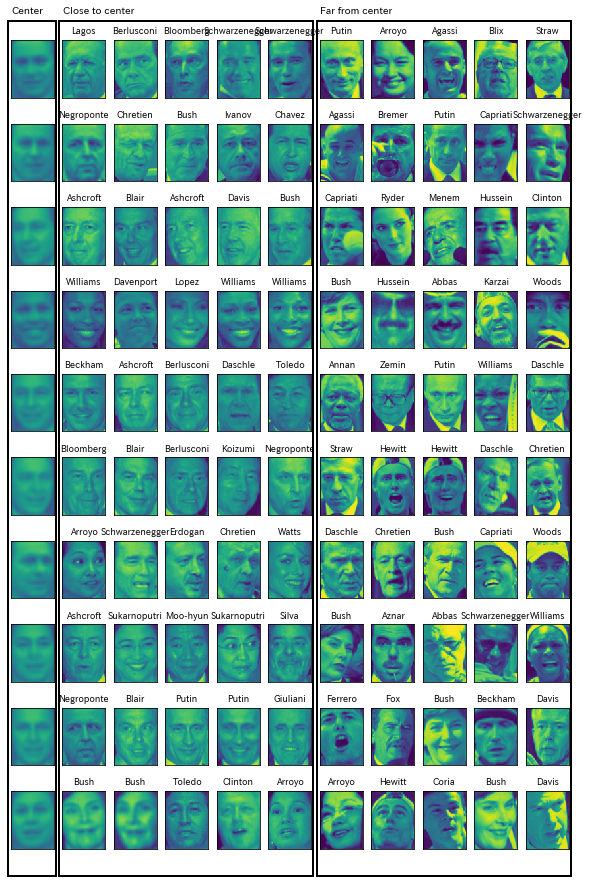

In [23]:
# クラスタセンタに対してそのクラスタ内の典型的な5枚と最も典型的でない画像を示す
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                               y_people, people.target_names)

##### 凝集型クラスタリングによる顔画像データセットの解析

In [24]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Clusetr sizes agglomerative clustering: {}'.format(np.bincount(labels_agg)))

Clusetr sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [27]:
# 凝集型クラスタリングとk-meansの結果の分割が似ているかARIで測る
from sklearn.metrics.cluster import adjusted_rand_score

print('ARI: {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluser distance')

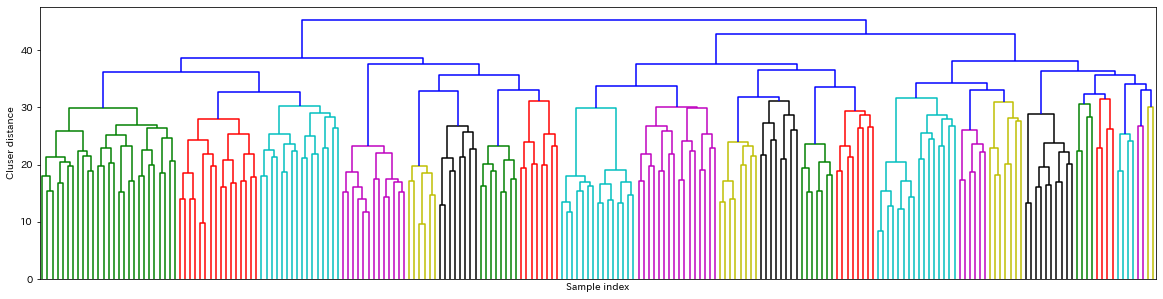

In [30]:
# デンドログラムを描画
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca)
# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムとしてプロットする
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluser distance')

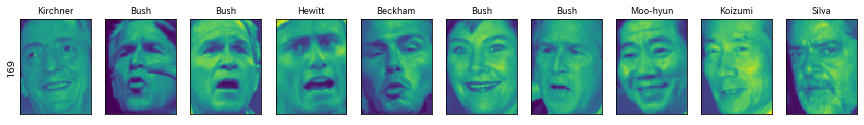

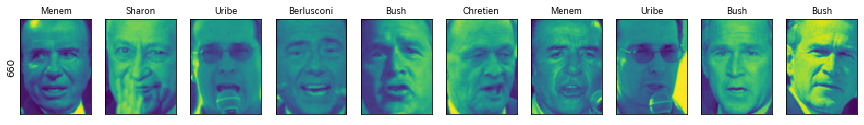

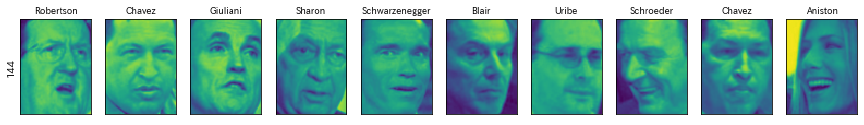

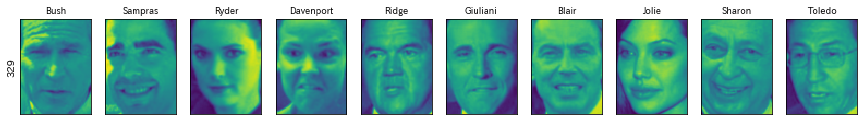

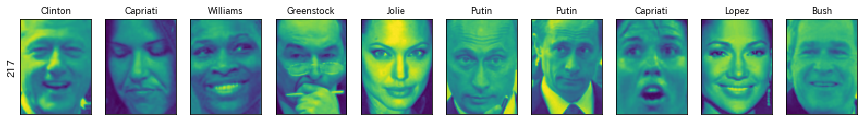

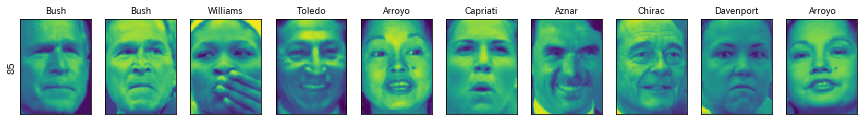

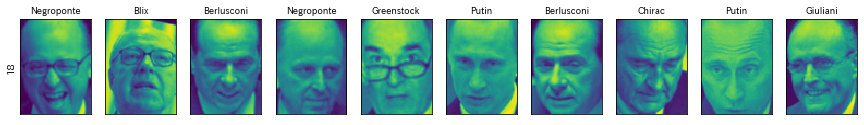

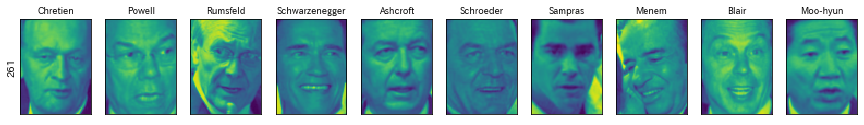

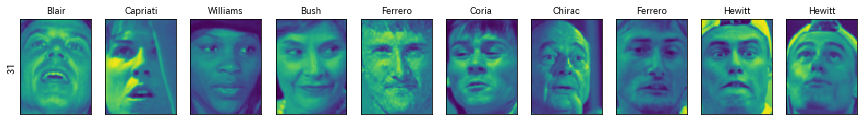

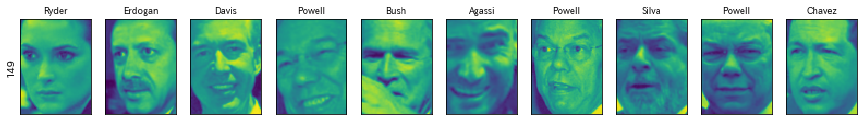

In [31]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


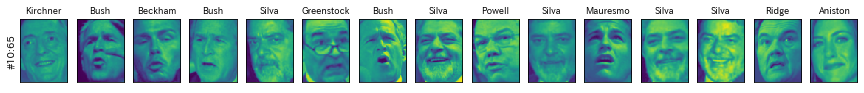

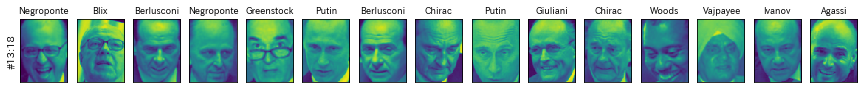

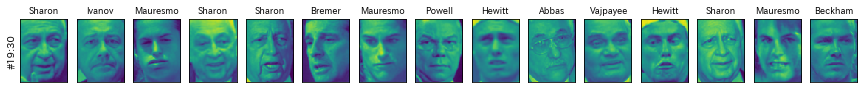

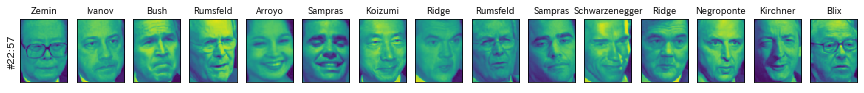

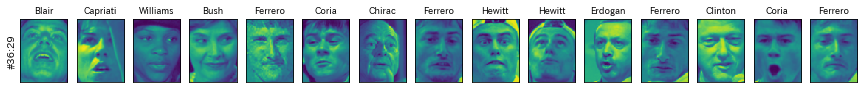

In [37]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('cluster sizes agglomerative clustering: {}'.format(np.bincount(labels_agg)))

n_clusters =40
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    cluster_size= np.sum(mask)
    axes[0].set_ylabel('#{}:{}'.format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)   
    